In [6]:
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:

dataset = 'small'
path = 'recall_ftF_simF' # all_ftF_simF
save_path = os.path.join("/home/v-mezhang/blob/model/", dataset, path)

In [8]:
policy = 'epsilon_greedy'
paras = [0, 0.1, 0.2] # '1overt'
rewards = {}
opt_rewards = {}

In [9]:
policy_names = ['ucb_0.1', 'ucb_0.2', 'ucb_logt'] # 'ucb_0.1'
# policy_names = []
for para in paras:
    policy_name = policy + '_' + str(para)
    policy_names.append(policy_name)

policy_names

['ucb_0.1',
 'ucb_0.2',
 'ucb_logt',
 'epsilon_greedy_0',
 'epsilon_greedy_0.1',
 'epsilon_greedy_0.2']

In [10]:
for policy_name in policy_names:
    with open(os.path.join(save_path, (policy_name + "_rewards.pkl")), "rb") as f:
        rewards[policy_name] = pickle.load(f)
    with open(os.path.join(save_path, (policy_name+ "_opt_rewards.pkl")), "rb") as f:
        opt_rewards[policy_name] = pickle.load(f)


In [11]:
cumu_regrets = {}
for para in policy_names:
    num_exper, num_sam = rewards[para].shape
    cumu_regrets[para] = np.zeros((num_exper, num_sam))
    for i in range(num_exper):
        cumu_reward = 0
        cumu_opt_reward = 0

        for j in range(num_sam):
            cumu_reward += rewards[para][i,j]
            cumu_opt_reward += opt_rewards[para][i,j]
            # cumu_regrets[para][i,j] = (cumu_opt_reward - cumu_reward) /(j+1) 
            cumu_regrets[para][i,j] = (cumu_reward) /(j+1) # cumu reward

0.6678172849735627
0.6677514137312283
0.6682235787492232
0.6638519159340182
0.6642238275281452
0.664113707222074


(0.6, 0.7)

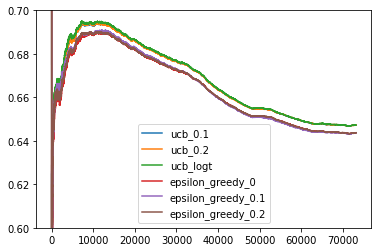

In [16]:
for policy_name, value in cumu_regrets.items():
    plt.plot(range(num_sam), value.mean(axis=0), label = policy_name)
    # plt.hlines(value.mean(), list(range(num_sam))[0], list(range(num_sam))[-1])
    print(value.mean())
plt.legend()
plt.ylim(0.6, 0.7)


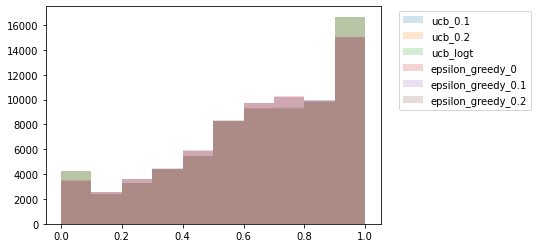

In [13]:
for policy_name, value in rewards.items():
    # if policy_name in ['epsilon_greedy_0', 'epsilon_greedy_0.1']:
    plt.hist(value.mean(axis = 0), label = policy_name, alpha = 0.2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

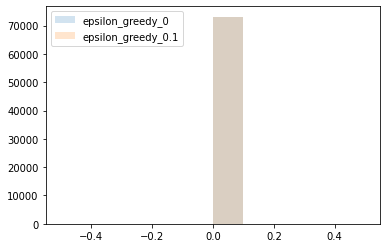

In [14]:
for policy_name, value in opt_rewards.items():
    if policy_name in ['epsilon_greedy_0', 'epsilon_greedy_0.1']:
        plt.hist(value.mean(axis = 0), label = policy_name, alpha = 0.2)
plt.legend()

In [15]:
[int(i) for i in np.concatenate([[], [0,1]])]

[0, 1]